I ran ANNz2 in "ANN" mode with 4000 galaxies to train and 4725 galaxies in the test/evaluation set. I pulled the same 4725 galaxies out of a BPZ run I did on the same hectospec galaxies using very simlar settings to what is run in the DLS database (I did not actually query the database, so the numbers in the sql database may be slightly different).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt("ANNZ_singleReg_0000.csv",delimiter=",",skip_header=1)

In [3]:
print data.shape
sz = data[:,0]
pz = data[:,1]
pzerr = data[:,3]


(4725, 4)


In [4]:
bpzdata = np.genfromtxt("bpztest_subset_newnovhectospec_trim.dat",delimiter=",")
print bpzdata.shape
bpzzb = bpzdata[:,0]
bpzsz = bpzdata[:,1]
bpzmag = bpzdata[:,2]
print len(bpzmag)

(4725, 3)
4725


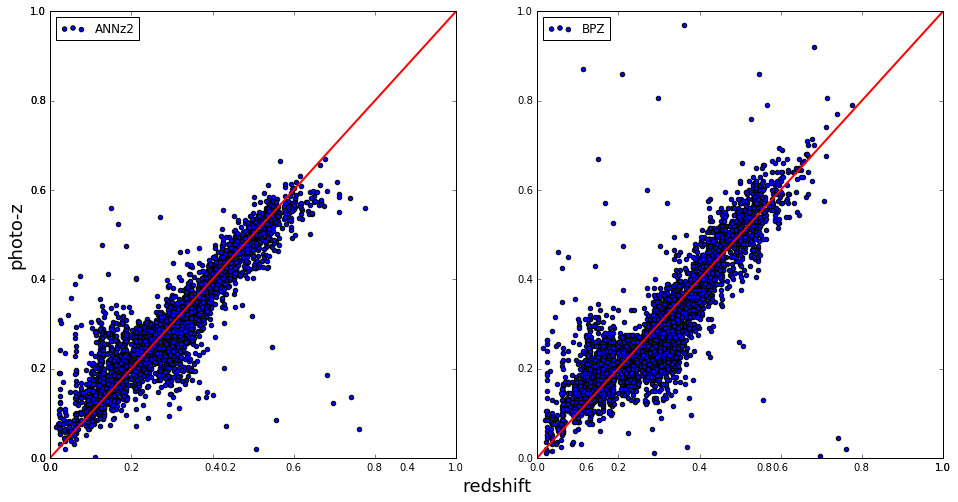

In [5]:
tmplim = [0,1]
fig = plt.figure(figsize=(16,8))
bothx = fig.add_subplot(111,frameon=False)
ax = fig.add_subplot(121)
ax.scatter(sz,pz,c='b',marker='o',label='ANNz2')
ax.set_xlim(tmplim)
ax.set_ylim(tmplim)
ax.plot([0,1],[0,1],linestyle='-',lw=2,c='r')
bx = fig.add_subplot(122)
bx.set_xlim(tmplim)
bx.set_ylim(tmplim)
bx.scatter(bpzsz,bpzzb,c='b',marker='o',label='BPZ')
bx.plot([0,1],[0,1],linestyle='-',lw=2,c='r')
ax.legend(loc="upper left")
bx.legend(loc="upper left")
bothx.set_xlabel("redshift",fontsize=18)
bothx.set_ylabel("photo-z",fontsize=18)

Results look pretty much as expected: similar structure, but slightly tighter scatter for the ML method vs the template method, more outliers for template method, and better performance for the highest redshift points (ML methods tend to do bad at the extrema of low and high z, though ANNz2 is doing pretty well at low-z here).